#  JOIN 
if you want to check the duplicate data you can check before and after merge using shape. 
1. INNER JOIN 
 - .merge, on, suffixes = ['X','Y']
2. ONE TO MANY RELATIONSHIP
 - more like left join, using the same function as inner join
3. MULTIPLE DATAFRAMES
 - don't forget to put backlash \
4. LEFT JOIN
 - on, how
5. RIGHT JOIN
 - right join
 - if different name then "left_on, right_on
6. Outer Join
 - all data combine between 2 table/dataframe
7. Merging a table to itself
 - when to merge at table to itself:
   - hierarchical relationships
   - sequential relationships
   - Graph data
8. Merging on Indexes
   - treat the same as other column 

In [1]:
import pandas as pd
taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh = pd.read_pickle('taxi_vehicles.p')
wards = pd.read_pickle('census.p')
census = pd.read_pickle('ward.p')
licenses = pd.read_pickle('licenses.p')
biz_owners = pd.read_pickle('business_owners.p')
cal = pd.read_pickle('cta_calendar.p')
ridership =pd.read_pickle('cta_ridership.p')
stations = pd.read_pickle('stations.p')
zip_demo= pd.read_pickle('zip_demo.p')
land_use=pd.read_pickle('land_use.p')
movies = pd.read_pickle('movies.p')
financials= pd.read_pickle('financials.p')
taglines= pd.read_pickle('taglines.p')
movies_genre = pd.read_pickle('movie_to_genres.p')
actors_movies = pd.read_csv('actors_movies.csv')
casts = pd.read_pickle('casts.p')
crews= pd.read_pickle('crews.p')
ratings = pd.read_pickle('ratings.p')
sequels = pd.read_pickle('sequels.p')
sp500 = pd.read_csv('S&P500.csv')
gdp= pd.read_csv('WorldBank_GDP.csv')
pop = pd.read_csv('WorldBank_POP.csv')

/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh,on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [3]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


In [4]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on = 'ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


In [5]:
# Print the first few rows of the wards_altered table to view the change 
print(wards[['ward']].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

  ward
0    1
1    2
2    3
3    4
4    5
wards_altered_census table shape: (50, 9)


In [6]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners,on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account',ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


In [7]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


In [8]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards,on='ward')
licenses_zip_ward.columns

Index(['account', 'ward', 'aid', 'business', 'address_x', 'zip_x', 'income',
       'pop_2000', 'pop_2010', 'change', 'address_y', 'zip_y'],
      dtype='object')

In [9]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards,on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('business').agg({'income':'median'}))


                                                      income
business                                                    
"EXODUS" - LIFE SKILLS TRAINING, INC.                41679.0
"HIS" GIFT TO ME :The Inspirational Novelty Sho...   59488.0
"SABOR MEXICO" RESTAURANT                            31445.0
"YO" WAY HAIR SALON                                  38206.0
#1 GYM                                               88708.0
...                                                      ...
salon rupa                                           50554.0
subway                                               24941.0
superior Equipment Repair, Inc.                      41307.0
tom lee chinese kitchen                              63106.0
x y zanne                                           100116.0

[9810 rows x 1 columns]


In [10]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census,on='ward')\
.merge(licenses,on='ward',suffixes=['_cen','_lic'])

In [11]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','residential','vacant'],
                                   as_index=False).agg({'account':'count'})

In [12]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','residential','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','residential'], 
                                             ascending=[False,True,True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  residential  vacant  account
47    7           39      19       80
12   20           23      15      123
1    10           10      14      130
16   24           24      13       98
7    16           37      13      156


In [13]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials,on='id',how='left')
print(movies.shape)
print(financials.shape)

(4803, 4)
(3229, 3)


In [14]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)
print(movies_financials.shape)


1574
(4803, 6)


In [15]:
toy_story = movies[movies['title'].str.contains("Toy Story")]

In [16]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines,on='id',how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [17]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines,on='id',how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


In [18]:
action_movies = movies_genre[movies_genre['genre']=='Action']
scifi_movies = movies_genre[movies_genre['genre']=='Science Fiction']
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies,on='movie_id',how='right',suffixes = ['_act','_sci'])
action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [19]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only,how='inner',left_on='id',right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


In [20]:
movies_genre.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


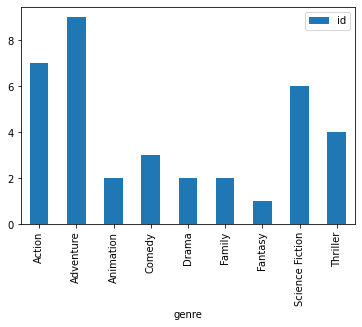

In [21]:
import matplotlib.pyplot as plt
movie_to_genres = movies_genre
pop_movies=movies.sort_values('popularity',ascending=False).head(10)

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on = 'movie_id', right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()


In [22]:
iron_man_movies = movies[movies['title'].isin(['Iron Man','Iron Man 2'])]
iron_actors = casts.merge(iron_man_movies,how='inner',left_on='movie_id',right_on='id')
iron_actors['id']= iron_actors['cast_id']
iron_1_actors = iron_actors[iron_actors['title']=='Iron Man']
iron_2_actors = iron_actors[iron_actors['title']=='Iron Man 2']
# print(casts.head())
# print(movies.head())

In [23]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     how='outer',
                                     on = 'id',
                                     suffixes=['_1','_2'])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

   movie_id_1  cast_id_1                                   character_1  \
0      1726.0        9.0                                        Yinsen   
1      1726.0       10.0                       Virginia "Pepper" Potts   
2      1726.0       11.0                   Obadiah Stane / Iron Monger   
3      1726.0       12.0  Lt. Col. James "Rhodey" Rhodes / War Machine   
4      1726.0       17.0                            Christine Everhart   

   gender_1   id_x_1           name_1  id_y_1   title_1  popularity_1  \
0       2.0  17857.0       Shaun Toub  1726.0  Iron Man    120.725053   
1       1.0  12052.0  Gwyneth Paltrow  1726.0  Iron Man    120.725053   
2       2.0   1229.0     Jeff Bridges  1726.0  Iron Man    120.725053   
3       2.0  18288.0  Terrence Howard  1726.0  Iron Man    120.725053   
4       1.0  57451.0      Leslie Bibb  1726.0  Iron Man    120.725053   

  release_date_1  ...  movie_id_2  cast_id_2  character_2 gender_2  id_x_2  \
0     2008-04-30  ...         NaN     

In [24]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id',suffixes=['_dir','_crew'] )
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [25]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


In [26]:
print(movies.head())
print(ratings.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
       id  vote_average  vote_count
0   19995           7.2     11800.0
1     285           6.9      4500.0
2  206647           6.3      4466.0
3   49026           7.6      9106.0
4   49529           6.1      2124.0


In [27]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings,on='id')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


In [28]:
print(sequels.head())
print(financials.head())

      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>
       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08


In [29]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',right_on='id', right_index=False,suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

In [30]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=False,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]
# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff',ascending=False).head())

            title_org        title_seq          diff
28  Jurassic Park III   Jurassic World  1.144748e+09
26      Batman Begins  The Dark Knight  6.303398e+08
11         Iron Man 2       Iron Man 3  5.915067e+08
1         Toy Story 2      Toy Story 3  5.696028e+08
14  Quantum of Solace          Skyfall  5.224703e+08


# Filtering Joins 
- Mutating joins:
  Combines data from two tables based on matching observations in both tables 
- Filtering joins:
  Filter observations from table based on whether or not they match an observation in another table
1. .isin
   

In [31]:
# example of filter join 
# semi join 
movie_and_genre = movies.merge(movies_genre,how='left',left_on='id',right_on='movie_id',indicator=True)
movie_list = movie_and_genre.loc[movie_and_genre['_merge']=='left_only','id']
# get movie without genre information 
movie_and_genre[movie_and_genre['id'].isin(movie_list)]


,id,title,popularity,release_date,movie_id,genre,_merge
458,300327,Death Calls,0.005883,2010-09-01,NaN,NaN,left_only
806,281189,Gory Gory Hallelujah,0.033883,2003-11-05,NaN,NaN,left_only
1258,191229,Iguana,0.214704,1988-04-01,NaN,NaN,left_only
1409,320435,UnDivided,0.010607,2013-02-01,NaN,NaN,left_only
1865,294550,The Outrageous Sophie Tucker,0.021419,2014-05-02,NaN,NaN,left_only
2091,365052,The Looking Glass,0.062979,2015-10-23,NaN,NaN,left_only
2548,219716,Sparkler,0.547654,1999-03-19,NaN,NaN,left_only
2977,206412,Lisa Picard Is Famous,0.690089,2000-05-14,NaN,NaN,left_only
3357,331493,Light from the Darkroom,0.012942,2014-01-01,NaN,NaN,left_only
3731,297100,The Little Ponderosa Zoo,0.073079,2014-09-11,NaN,NaN,left_only


In [32]:
# anti join 
#inner join 
movie_and_genre_2 = movies.merge(movies_genre,how='inner',left_on='id',right_on='movie_id')

#use .isin() to subset 
top_movies = movies[movies['id'].isin(movie_and_genre_2['id'])]

#group the top_movies by id and count the id rows 
cnt_by_id = top_movies.groupby(['id'],as_index=False).agg(max)

# merge the genres tables to cnt_by_id on id and print 
print(cnt_by_id)

          id                        title  popularity release_date
0          5                   Four Rooms   22.876230   1995-12-09
1         11                    Star Wars  126.393695   1977-05-25
2         12                 Finding Nemo   85.688789   2003-05-30
3         13                 Forrest Gump  138.133331   1994-07-06
4         14              American Beauty   80.878605   1999-09-15
...      ...                          ...         ...          ...
4770  426067             Midnight Cabaret    0.001389   1990-01-01
4771  426469             Growing Up Smith    0.710870   2017-02-03
4772  433715                       8 Days    0.015295   2014-06-15
4773  447027              Running Forever    0.028756   2015-10-27
4774  459488  To Be Frank, Sinatra at 100    0.050625   2015-12-12

[4775 rows x 4 columns]


# Concatenate DataFrames together vertically 
- union all in SQL >> so if the data same between table will be duplicated, not union.please remember 
- pd.concat([tbl_1,tbl_2,tbl_3])
- ignore_index=True
- keys =['','',''] make sure ignore_index False
- join = 'inner' >> only column that's same in both table will be joined 


In [33]:
movies_genre_crime = movie_and_genre[movie_and_genre['genre']=='Crime']
movies_genre_drama = movie_and_genre[movie_and_genre['genre']=='Drama']
movies_genre_family = movie_and_genre[movie_and_genre['genre']=='Family']
movies_test = movie_and_genre[movie_and_genre['genre'].isin(['Crime','Drama'])]

# concatenate the movie (will be duplicated) 
movies_master= pd.concat([movies_genre_crime, movies_genre_drama, movies_genre_family])
movies_master_2 = pd.concat([movies_test, movies_genre_drama, movies_genre_family])


In [34]:
# Concatenate the tracks, show only columns names that are in all tables
movies_master = pd.concat([movies_genre_crime, movies_genre_drama, movies_genre_family],
                               join='inner',
                               sort=True)
print(movies_master)

      _merge   genre      id  movie_id  popularity release_date  \
0       both   Crime     257     257.0   20.415572   2005-09-23   
3       both   Crime   14290   14290.0    3.877036   2002-01-12   
29      both   Crime    2757    2757.0   26.441669   2002-12-06   
58      both   Crime      59      59.0   34.628738   2005-09-23   
84      both   Crime    9437    9437.0   18.913000   1997-10-03   
...      ...     ...     ...       ...         ...          ...   
12105   both  Family  218778  218778.0   22.145950   2014-10-08   
12129   both  Family   34723   34723.0    2.163683   1993-04-02   
12145   both  Family   82690   82690.0   62.341073   2012-11-01   
12161   both  Family    9023    9023.0   41.670544   2002-05-24   
12166   both  Family   39691   39691.0   11.773980   2010-07-30   

                                                   title  
0                                           Oliver Twist  
3                                   Better Luck Tomorrow  
29                

# Verifying integrity 
- Why?
  1. Real world data is not clean 
- merging issues:
  1. unintentional one to many relationship
  2. unintentional many to many relationship
 - how?
   - validate relationship: one_to_one or many to many or one to many by looking to each data in table
   - or put validate = 'one_to_one'/        validate='one_to_many'
- concatenating issues:
  1. duplicate records possibly unintentionally introduced
 - how?
   - verifiyng concatenations using verify_integrity by default value is false, to verify you need to change it into True 

In [35]:
# example of verifying merge 
movie_and_genre_2 = movies.merge(movies_genre,how='inner',left_on='id',right_on='movie_id',validate='many_to_many')
# will result in error if you put validate as many to one, because the relationship between movies and movies genre is many to many or one to many, not many to one 

# example of many to one relationship 
movie_and_genre_2 = movies_genre.merge(movies,how='inner',left_on='movie_id',right_on='id',validate='many_to_one')


# example of verifying concat 
test_1= pd.concat([movies_genre_crime,movies_test], join ='inner', verify_integrity = False) # no error since verify_integrity by default is false 
# movie_genre_crime is part of movie_test 
# test_2 = pd.concat([movies_genre_crime,movies_test], join ='inner', verify_integrity = True) #  will return error 

# this one will not return error 
test_2 = pd.concat([movies_genre_crime,movies_genre_drama], join ='inner', verify_integrity = True)

# Merge ordered 
1. .merge() method:
   - column(s) to join on : on, left_on, and right_on
   - type of join : how (left, right, inner, outer) >> default inner
   - overlapping column names : suffixes
   - calling the method: df1.merge(df2)
3. merge_ordered() method:
   - column(s) to join on : on, left_on, and right_on
   - type of join : how(left, right, inner, outer) >> default outer
   - overlapping column names : suffixes
   - calling the function: pd.merge_ordered(df1, df2)
   - forward fill >> fill_method='ffill'

In [36]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp.columns = gdp.columns.str.lower().str.replace(' ','_')
sp500.columns= sp500.columns.str.lower().str.replace(' ','_')
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date',how='left')
gdp
# # Print gdp_sp500
# print(gdp_sp500)

,country_name,country_code,indicator_name,year,gdp
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12
5,Germany,DEU,GDP (current US$),2011,3.757700e+12
6,Japan,JPN,GDP (current US$),2011,6.157460e+12
7,United States,USA,GDP (current US$),2011,1.554260e+13
8,China,CHN,GDP (current US$),2012,8.532230e+12
9,Germany,DEU,GDP (current US$),2012,3.543980e+12


In [37]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp,sp500,how= 'left',left_on = 'year',right_on='date',fill_method='ffill')


# Print gdp_sp500
gdp_returns = gdp_sp500[['gdp','returns']]
gdp_returns.corr()

,gdp,returns
gdp,1.000000,0.040669
returns,0.040669,1.000000


In [38]:
# Use merge_ordered() to merge inflation, unemployment with inner join
# inflation_unemploy = pd.merge_ordered(inflation, unemployment, how='inner', on = 'date')

# Print inflation_unemploy 
# print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
# inflation_unemploy.plot(kind='scatter', x='unemployment_rate',y='cpi')
# plt.show()

In [39]:

gdp.columns = gdp.columns.str.lower().str.replace(' ','_')
pop.columns = pop.columns.str.lower().str.replace(' ','_')

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp,pop,on=['year','country_code'], 
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)


     country_name_x country_code   indicator_name_x  year           gdp  \
0               NaN          ABW                NaN  2010           NaN   
1               NaN          AFG                NaN  2010           NaN   
2               NaN          AGO                NaN  2010           NaN   
3               NaN          ALB                NaN  2010           NaN   
4               NaN          AND                NaN  2010           NaN   
...             ...          ...                ...   ...           ...   
2643  United States          XKX  GDP (current US$)  2018  2.049410e+13   
2644  United States          YEM  GDP (current US$)  2018  2.049410e+13   
2645  United States          ZAF  GDP (current US$)  2018  2.049410e+13   
2646  United States          ZMB  GDP (current US$)  2018  2.049410e+13   
2647  United States          ZWE  GDP (current US$)  2018  2.049410e+13   

     country_name_y   indicator_name_y         pop  
0             Aruba  Population, total    1016

In [40]:

gdp.columns = gdp.columns.str.lower().str.replace(' ','_')
pop.columns = pop.columns.str.lower().str.replace(' ','_')

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp,pop,on=['country_code','year'], 
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)


# When you merge on date first, 
# the table is sorted by date then country. 
# When forward fill is applied, 
# Sweden's population value in January is used to fill in the missing values for both Australia and the Sweden for the remainder of the year. 
# This is not what you want. The fill forward is using unintended data to fill in the missing values. 
# However, when you merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.

     country_name_x country_code   indicator_name_x  year           gdp  \
0               NaN          ABW                NaN  2010           NaN   
1               NaN          ABW                NaN  2011           NaN   
2               NaN          ABW                NaN  2012           NaN   
3               NaN          ABW                NaN  2012           NaN   
4               NaN          ABW                NaN  2013           NaN   
...             ...          ...                ...   ...           ...   
2643  United States          ZWE  GDP (current US$)  2014  2.049410e+13   
2644  United States          ZWE  GDP (current US$)  2015  2.049410e+13   
2645  United States          ZWE  GDP (current US$)  2016  2.049410e+13   
2646  United States          ZWE  GDP (current US$)  2017  2.049410e+13   
2647  United States          ZWE  GDP (current US$)  2018  2.049410e+13   

     country_name_y   indicator_name_y         pop  
0             Aruba  Population, total    1016

# Merge_asof() 
1. similar to merge_ordered() left join
2. match on the nearest key column and not <b>exact matches</b>
3. direction = 'forward'
4. when to use?
   - data sampled from a process
   - developing a training set (no data leakage) 

In [41]:
# for example will use market data 
!pip install yfinance

You should consider upgrading via the '/Users/tiatitisari/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


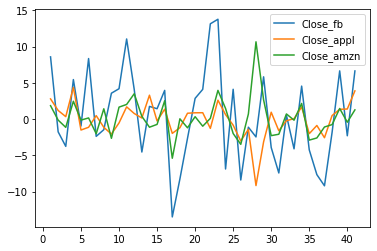

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yahooFinance 

fb = yahooFinance.Ticker("META").history(period='2mo')
appl = yahooFinance.Ticker('AAPL').history(period='2mo')
amzn = yahooFinance.Ticker('AMZN').history(period='2mo')
fb_df = pd.DataFrame(fb).reset_index()
appl_df = pd.DataFrame(appl).reset_index()
amzn_df = pd.DataFrame(amzn).reset_index()

## subset columns fro each data
fb_df = fb_df[['Date','Close']]
appl_df = appl_df[['Date','Close']]
amzn_df = amzn_df[['Date','Close']]
# use merge_asof() to merge appl and fb 
fb_appl = pd.merge_asof(fb_df, appl_df, on= 'Date', direction = 'nearest',suffixes=['','_appl'])
fb_appl_amzn = pd.merge_asof(fb_appl, amzn_df, on ='Date',direction = 'nearest', suffixes=['_fb','_amzn'])

# calculate differences using .diff() 
price_diff = fb_appl_amzn.diff()

# Visualize the diff 
price_diff.plot(y=['Close_fb','Close_appl','Close_amzn'])
plt.show()

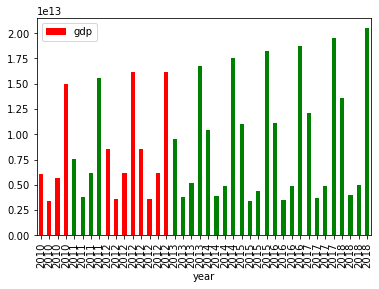

In [73]:
dict = {'year':[2010,2011,2012,2013],'econ_status':['recession','normal','recession','normal']}
recession = pd.DataFrame(dict)

# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp,recession, on = 'year')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s == 'recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar',y='gdp',x = 'year',color=is_recession,rot=90)
plt.show()

# .Query
- for dataframe
- and/or
- df.query('condition')

In [94]:
gdp_top_10 = gdp.sort_values('gdp', ascending=False).query('year>=2017').head(10)

,country_name,country_code,indicator_name,year,gdp
39,United States,USA,GDP (current US$),2018,2.049410e+13
35,United States,USA,GDP (current US$),2017,1.948540e+13
36,China,CHN,GDP (current US$),2018,1.360820e+13
32,China,CHN,GDP (current US$),2017,1.214350e+13
38,Japan,JPN,GDP (current US$),2018,4.970920e+12
34,Japan,JPN,GDP (current US$),2017,4.859950e+12
37,Germany,DEU,GDP (current US$),2018,3.996760e+12
33,Germany,DEU,GDP (current US$),2017,3.693200e+12


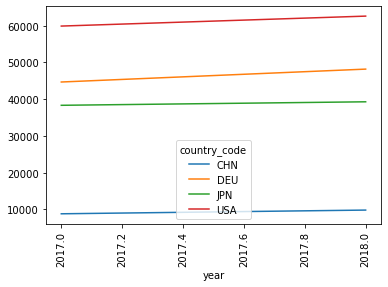

In [96]:

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp_top_10, pop, on=['country_code','year'],how='left', fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'year', 'country_code')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('year>=2010')
recent_gdp_pop

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

# .melt()
- will allow us to unpivot our dataset
- id_vars = as identifier >> the one we don't want to change
- value_vars = as column in wide table which column we want to unpivot
- var_name = to change the value column name consisting variable  
- value_name = to change value column name consisting data

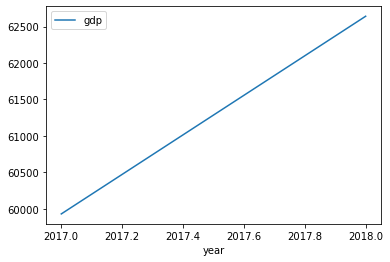

In [124]:
# unpivot everything besides the year column
gdp_unpivot = gdp_pivot.reset_index().melt(id_vars=['year'],var_name='country',value_name='gdp')
gdp_unpivot = gdp_unpivot[gdp_unpivot['country']=='USA']

# Create a date column using the month and year columns of ur_tall
# Plot the unempl_rate by date
gdp_unpivot.plot(y='gdp',x='year')
plt.show()

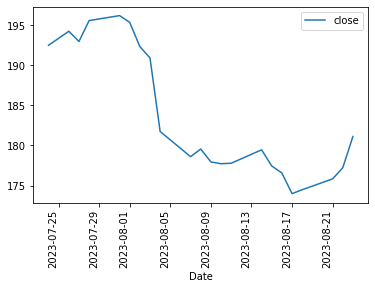

In [144]:
import yfinance as YahooFinance
aapl = YahooFinance.Ticker('AAPL').history('>1mo').reset_index()
aapl_unpivot=aapl.melt(id_vars=['Date'],var_name='metric',value_name='close')

# Use query on bond_perc to select only the rows where metric=close
aapl_unpivot_close=aapl_unpivot.query('metric=="Close"').sort_values('close')

# Plot only the close_dow and close_bond columns
aapl_unpivot_close.plot(y='close', x='Date', rot=90)
plt.show()
